# A Short Data Story

## Introduction

### Dataset intro

The dataset is a collection of incident reports from a police department database, detailing a wide array of incidents ranging from robbery to vehicle theft, arson, and assault. Each record includes unique identifiers, a general category and detailed description of the incident, the day of the week, date and time it occurred, the police district it took place in, and its resolution status. Additionally, the dataset encompasses a variety of location information, with specific emphasis on administrative and geographical divisions, categorizations of areas based on different criteria such as vulnerability, and details regarding specific zones and neighborhoods. This makes it a comprehensive source for analyzing crime patterns, police response, and public safety issues. 

### Website intro

This web-page is designed as a vital resource for the residents of San Francisco, aiming to shed light on emerging crime trends within the city. Its primary objective is to equip citizens with current and comprehensive information on the types of crimes that are witnessing an uptick, enabling them to stay informed and vigilant.

To achieve this, the page will feature different graphs and visual representations, offering an at-a-glance overview of the crime categories that are currently exhibiting the most alarming trends. These visual aids are not only intended to present a broad snapshot of the city's crime landscape but also to pinpoint which specific types of criminal activities are becoming more prevalent.

In a further effort to empower residents with detailed knowledge that could affect their safety, the webpage will delve into crime data spanning from 2015 to 2017, presenting it in a manner that is both accessible and easy to understand. This detailed visualization aims to provide citizens with the insights necessary to assess their personal risk based on their specific location within San Francisco.

By navigating through this data, individuals can gain a clearer understanding of how crime rates vary across different neighborhoods and over time, potentially influencing their daily decisions and lifestyle choices. The ultimate goal of this webpage is to foster a well-informed community, where every resident has the tools and information needed to contribute to their own safety and the safety of their neighbors.

## Data Prep

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import FactorRange, ColumnDataSource
from bokeh.palettes import Category20
from bokeh.models import Legend

In [98]:
df=pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240214.csv")
df['Datetime']=pd.to_datetime(df.Date+' '+df.Time,format='%m/%d/%Y %H:%M')
df=df[df.Datetime.dt.year!=2018]

## Time Series Plot

In [99]:
#focuscrimes_st = sorted(set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']))
focus_crimes_st = sorted(set(['LARCENY/THEFT','STOLEN PROPERTY','TRESPASS','VANDALISM','WEAPON LAWS']))

In [100]:
crime_cat_year=[]
for crime in focus_crimes_st:
    crime_cat_year.append(np.unique(df[df.Category==crime]['Datetime'].dt.year,return_counts=True))

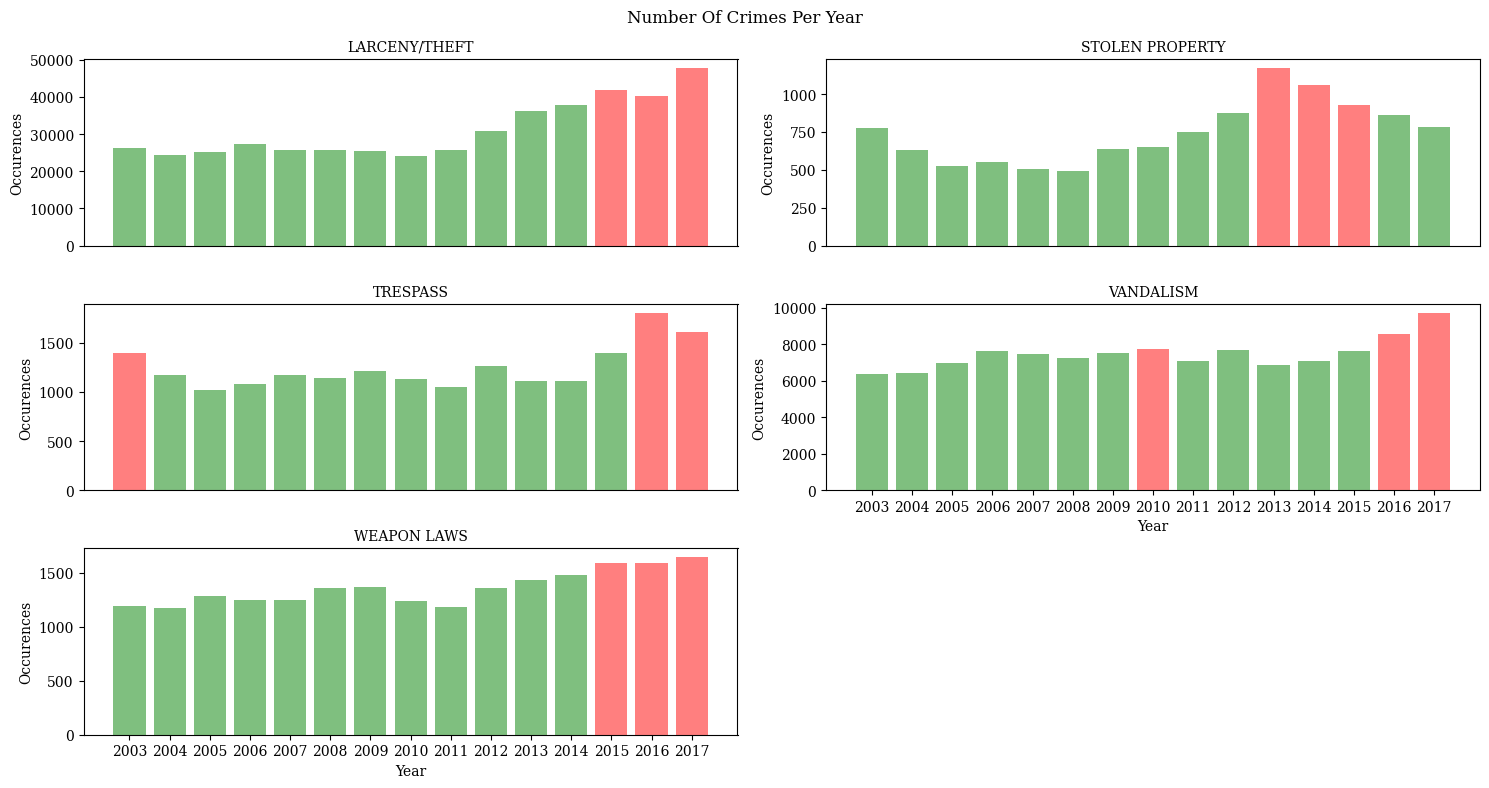

In [101]:
plt.figure(figsize=(15,8))

for i in range(len(focus_crimes_st)):
    highest_values=np.partition(crime_cat_year[i][1],-3)[-3:]
    
    mask_highest = np.isin(crime_cat_year[i][1], highest_values)
    colors = ['red' if m else 'green' for m in mask_highest]

    plt.subplot(3,2,i+1)
    plt.bar(crime_cat_year[i][0],crime_cat_year[i][1],alpha=0.5,color=colors)
    plt.title(focus_crimes_st[i],fontsize=10,fontdict={'family':'serif'})
    plt.ylabel('Occurences',fontdict={'family':'serif'})


    plt.yticks(fontname='serif')
    if (i == 3)|(i==4):
        plt.xlabel('Year',fontdict={'family':'serif'})
        plt.xticks(fontname='serif',ticks=crime_cat_year[i][0])
    else:
        plt.xlabel('')
        plt.xticks(ticks=[])

#plt.subplots_adjust(hspace=0.5)
plt.suptitle('Number Of Crimes Per Year',fontdict={'family':'serif'})
plt.tight_layout()
plt.savefig('time_series_plot.png')
plt.show()

The graphs presented serve as a visual examination of five distinct crime categories within San Francisco, with a focus on identifying trends in the frequency of these crimes from 2003 to 2017. The categories showcased are Larceny/Theft, Stolen Property, Trespass, Vandalism, and Weapon Laws.

A notable feature of these graphs is the use of color to emphasize the years that experienced the highest occurrence of crimes in each category—marked in red for immediate visibility. This color differentiation allows viewers to quickly discern patterns and potentially concerning increases in criminal activity over the last fifteen years.

For Larceny/Theft, the graph exhibits a fluctuating trend but shows a significant rise towards the latter years. Stolen Property, Trespass, and Vandalism categories also reflect a rising trend, with recent years standing out, indicating a growing concern. The graph for Weapon Laws shows less variability over the years, but an uptick is still visible in the latter period.

The intention behind marking the three most prevalent years in red is to draw attention to the most critical periods, thus encouraging residents, policymakers, and law enforcement to delve deeper into the underlying causes. It also aids in focusing preventive measures and resources on those years that could be the harbinger of a continuing or emerging trend. This visual approach to presenting crime data is an essential tool in community awareness efforts and strategic planning for public safety.

## Map Plot

In [102]:
map_SF=folium.Map([37.773972, -122.431297], tiles="CartoDB Positron",zoom_start=13)

In [103]:
df_Larceny=df[df.Category=='LARCENY/THEFT']

In [104]:
df_Larceny_copy = df_Larceny.copy() 

df_Larceny_copy.loc[:, 'Y'] = df_Larceny_copy['Y'].astype(float)
df_Larceny_copy.loc[:, 'X'] = df_Larceny_copy['X'].astype(float)

df_Larceny = df_Larceny_copy


In [105]:
heat_df = df_Larceny[df_Larceny['Datetime'].dt.year.isin([2015, 2016, 2017])]

heat_df = heat_df[['Y', 'X']]
heat_df = heat_df.dropna(axis=0, subset=['Y','X'])

heat_data = [[row['Y'],row['X']] for index, row in heat_df.iterrows()]

HeatMap(heat_data,radius=15).add_to(map_SF)

In [106]:
map_SF

In [107]:
map_SF.save('map_SF.html')

The plot visualizes a heat map of larceny/theft incidents across San Francisco, highlighting crime hotspots over a three-year period. The intensity of the colors ranges from blue to red, where warmer colors indicate higher frequencies of reported incidents. Areas with the most concentrated crime rates are encircled in red, allowing for quick identification of regions with the highest levels of larceny/theft. This map provides a clear, at-a-glance view of the spatial distribution of this particular crime category within the city's boundaries.

## Bokeh Plot

In [108]:
output_notebook()

Loading BokehJS ...

In [109]:
focuscrimes = sorted(set(['LARCENY/THEFT','STOLEN PROPERTY','TRESPASS','VANDALISM','WEAPON LAWS']))

df_distr=df[df.Category.isin(focuscrimes)]
df_distr=df_distr[df_distr['Datetime'].dt.year.isin([2015, 2016, 2017])]

districts=sorted(df_distr.PdDistrict.unique()[:-1])
df_viz=pd.DataFrame()

In [110]:
for distr in districts:
    df_viz[distr]=df_distr[df_distr.PdDistrict==distr].Category.value_counts().sort_index()

In [111]:
df_viz.index.names=['Category']
df_viz=df_viz.reset_index()

In [112]:
source= ColumnDataSource(df_viz)
colors=Category20[10]

In [113]:
p = figure(title="Number of Crimes in each Police District (2015-2017)",
    x_axis_label="Number of Crimes",
        y_axis_label="Crimes Frequency", x_range = FactorRange(factors=source.data['Category'].astype(str).tolist()),
        width=800,
        height=600)

In [114]:
items = []  # List to store legend items
bar ={} # to store vbars

for indx,i in enumerate(districts):
    is_last_element = indx == len(districts) - 1
    muted_value = False if is_last_element else True
    bar[i] = p.vbar(x='Category',  top=i, source=source,
                    muted_alpha=0.02, muted=muted_value,
                    alpha=0.7,
                    width=0.5,
                    color=colors[indx % 10])
    items.append((i, [bar[i]]))

legend = Legend(items=items, location=(0, 100))
p.add_layout(legend, 'left')

In [115]:
p.legend.click_policy="mute" 

# 保存图表到文件
show(p)

'/Users/green/Documents/DTU_Courses/02806_Social_data_analysis_and_visualization/bokeh_plot.html'

The plot is a stacked bar chart representing the number of reported crimes across various police districts in San Francisco from 2015 to 2017. Each bar corresponds to a specific crime category, such as Larceny/Theft, Stolen Property, Trespass, Vandalism, and Weapon Laws, and is segmented by color to indicate the volume of incidents reported in each police district.

The chart allows for a comparative analysis of crime prevalence by district, with the length of the colored segments within each bar proportional to the count of crimes for that district. For instance, a larger segment in a bar suggests a higher number of reported incidents for that category in the corresponding district. This visual tool is beneficial for identifying which districts face higher crime rates and which specific types of crime are most common in each area, thereby informing law enforcement and community efforts to address public safety.

## Appendix

In [588]:
focuscrimes = sorted(set(['LARCENY/THEFT','STOLEN PROPERTY','TRESPASS','VANDALISM','WEAPON LAWS']))

In [589]:
df_foc=df[df.Category.isin(focuscrimes)]

In [590]:
crime_cats=np.unique(df_foc.Category)
total_counts_per_cat=df_foc.groupby('Category')['PdDistrict'].count()
df_viz=pd.DataFrame()

In [591]:
#for cat in crime_cats
for cat in focuscrimes:
    distr_counts=df[df.Category==cat].PdDistrict.value_counts().sort_index()
    df_viz[cat]=distr_counts/total_counts_per_cat[cat]

In [592]:
df_viz.index.names=['District']
df_viz=df_viz.reset_index()
df_viz.index.names=['Index1']

In [593]:
total_crime_counts = df.groupby('PdDistrict')['Category'].count()

# Sort districts by total crime counts (descending order)
sorted_districts = total_crime_counts.sort_values(ascending=False).index.tolist()

In [594]:
source= ColumnDataSource(df_viz)
colors=Category20[len(focuscrimes)]

In [595]:
p = figure(title="Crime Distribution in each District",
    x_axis_label="District",
    y_axis_label="Crimes Distribution", x_range = FactorRange(factors=sorted_districts)) 
#x_range = FactorRange(factors=source.data['District'].astype(str).tolist())) 
#p is a standard way to call figures in Bokeh
#make sure to add x_range. In my case hours is a list on the form ['1', '2', '3' ... , '24']
#read up on the FactorRange in the guide
#do not forget to add other attributes to the figure, e.g. title, axis names and so on

In [596]:
bar ={} # to store vbars
### here we will do a for loop:
for indx,i in enumerate(focuscrimes):
    bar[i] = p.vbar(x='District',  top=i, source=source,
                    ### we will create a vbar for each focuscrime
                    legend_label=i,  muted_alpha=0.1, muted = True,color=colors[indx]) 
#i stands for a column that we use, top=y; we are specifying that our numbers comes from column i
#read up what legend_label, muted and muted_alpha do... you can add more attributes (you HAVE TO)

In [597]:
p.legend.click_policy="mute" ### assigns the click policy (you can try to use ''hide'
show(p) #displays your plot